In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np
import wget

In [2]:
# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global (6).csv',
 'time_series_covid19_deaths_global (6).csv',
 'time_series_covid19_recovered_global (6).csv']

In [3]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [10]:
print(confirmed_df.columns)
print(deaths_df.columns)
print(recovered_df.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20',
       '5/17/20', '5/18/20', '5/19/20', '5/20/20'],
      dtype='object', length=124)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20',
       '5/17/20', '5/18/20', '5/19/20', '5/20/20'],
      dtype='object', length=124)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20',
       '5/17/20', '5/18/20', '5/19/20', '5/20/20'],
      dtype='object', length=124)


In [11]:
#all the columns from 4th column are dates 
confirmed_df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20',
       '5/17/20', '5/18/20', '5/19/20', '5/20/20'],
      dtype='object', length=120)

In [4]:
#converting all the date columns into values 
#use first 4 columns as identifier variables which later are used for merging 
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [7]:
#just to check if the above melting has worked or not 
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
31915,NaN,Sao Tome and Principe,0.186360,6.613081,5/20/20,251
31916,NaN,Yemen,15.552727,48.516388,5/20/20,184
31917,NaN,Comoros,-11.645500,43.333300,5/20/20,34
31918,NaN,Tajikistan,38.861034,71.276093,5/20/20,2140


In [5]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [9]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
31915,NaN,Sao Tome and Principe,0.186360,6.613081,5/20/20,251,8,4.0
31916,NaN,Yemen,15.552727,48.516388,5/20/20,184,30,NaN
31917,NaN,Comoros,-11.645500,43.333300,5/20/20,34,1,8.0
31918,NaN,Tajikistan,38.861034,71.276093,5/20/20,2140,41,NaN


In [8]:
#convert string to datetime ie in mm/dd/yyyy format
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [9]:
full_table.isna().sum()
#we see that there are many NaNs in recovered columns so replace them wih 0
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [10]:
# To calculate Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [11]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
31915,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-20,251,8,4.0,239.0
31916,NaN,Yemen,15.552727,48.516388,2020-05-20,184,30,0.0,154.0
31917,NaN,Comoros,-11.645500,43.333300,2020-05-20,34,1,8.0,25.0
31918,NaN,Tajikistan,38.861034,71.276093,2020-05-20,2140,41,0.0,2099.0


In [12]:
#aggregating the data country wise and grouping them by date and country
#sum() gives total count for all the three types of cases
#reset_index() resets the index and returns the default date and country
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [13]:
#add day wise New cases, New deaths and New recovered by deducting the corresponding accumulative data on the previous day.
#Confirmed, Deaths, Recovered and Active are cumulative data.
#New cases, New deaths and New Recovered are day wise data.
#the dataframes are ordered by Date and Country/Region.

temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

In [14]:
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')

In [15]:
import pandas as pd
import altair as alt    #using for statistical visualization
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
spain = full_grouped[full_grouped['Country/Region'] == 'Spain']

In [18]:
spain.head(75)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
158,158,2020-01-22,Spain,0,0,0.0,0.0,0,0,0
346,346,2020-01-23,Spain,0,0,0.0,0.0,0,0,0
534,534,2020-01-24,Spain,0,0,0.0,0.0,0,0,0
722,722,2020-01-25,Spain,0,0,0.0,0.0,0,0,0
910,910,2020-01-26,Spain,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13318,13318,2020-04-01,Spain,104118,9387,22647.0,72084.0,8195,923,3388
13506,13506,2020-04-02,Spain,112065,10348,26743.0,74974.0,7947,961,4096
13694,13694,2020-04-03,Spain,119199,11198,30513.0,77488.0,7134,850,3770
13882,13882,2020-04-04,Spain,126168,11947,34219.0,80002.0,6969,749,3706


In [4]:
#create a base chart with common elements
base = alt.Chart(spain).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)
red=alt.value("#f54242")
base.encode(y="Confirmed").properties(title="Total Confirmed")|base.encode(y="Deaths").properties(title="Total Deaths")

alt.HConcatChart(...)

In [21]:
red=alt.value("#f54242")
base.encode(y="New cases").properties(title="Daily New Cases")|base.encode(y="New deaths").properties(title="Daily New Deaths")

alt.HConcatChart(...)

In [16]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [17]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

N = 46,754,778

#Growth Factor
#The number of confirmed cases is increasing in many countries, but there are two types.
#In a first-type , growth factor is larger than 1 and the number of cases is rapidly increasing.
#In a second-type, growth factor is less than 1.

df = spain.pivot_table(
    index="Date", columns="Country/Region", values="Confirmed", aggfunc="sum"
).fillna(method="ffill").fillna(0)
# Growth factor: (delta Number_n) / (delta Number_n)
df = df.diff() / df.diff().shift(freq="D")
df = df.replace(np.inf, np.nan).fillna(1.0)
# Rolling mean (window: 7 days)
df = df.rolling(7).mean().dropna().loc[:spain["Date"].max(), :]
# round: 0.01
growth_value_df = df.round(2)
growth_value_df.tail(10)

Country/Region,Spain
Date,
2020-05-11,1.59
2020-05-12,1.27
2020-05-13,1.32
2020-05-14,1.35
2020-05-15,1.28
2020-05-16,1.32
2020-05-17,1.16
2020-05-18,0.74
2020-05-19,0.78


In [18]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

test = spain
train = full_table
display(train.tail())
display(train.describe())

confirmed_total_date_Spain = train[train['Country/Region']=='Spain'].groupby(['Date']).agg({'Confirmed':['sum']})
deaths_total_date_Spain = train[train['Country/Region']=='Spain'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(deaths_total_date_Spain)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
31915,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-20,251,8,4.0,239.0
31916,NaN,Yemen,15.552727,48.516388,2020-05-20,184,30,0.0,154.0
31917,NaN,Comoros,-11.645500,43.333300,2020-05-20,34,1,8.0,25.0
31918,NaN,Tajikistan,38.861034,71.276093,2020-05-20,2140,41,0.0,2099.0
31919,NaN,Lesotho,-29.609988,28.233608,2020-05-20,1,0,0.0,1.0


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,31920.000000,31920.000000,3.192000e+04,31920.000000,31920.000000,3.192000e+04
mean,21.148043,22.538640,4.907889e+03,326.657989,1472.925345,3.108306e+03
std,24.863512,70.334777,4.393073e+04,3033.757348,10690.551355,3.334338e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-6.000000e+00
25%,6.877000,-19.020800,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.488100,20.972650,1.900000e+01,0.000000,0.000000,7.000000e+00
75%,41.153300,78.000000,4.400000e+02,6.000000,87.000000,1.900000e+02
max,71.706900,178.065000,1.551853e+06,93439.000000,294312.000000,1.164102e+06


Text(0.5, 0, 'Date')

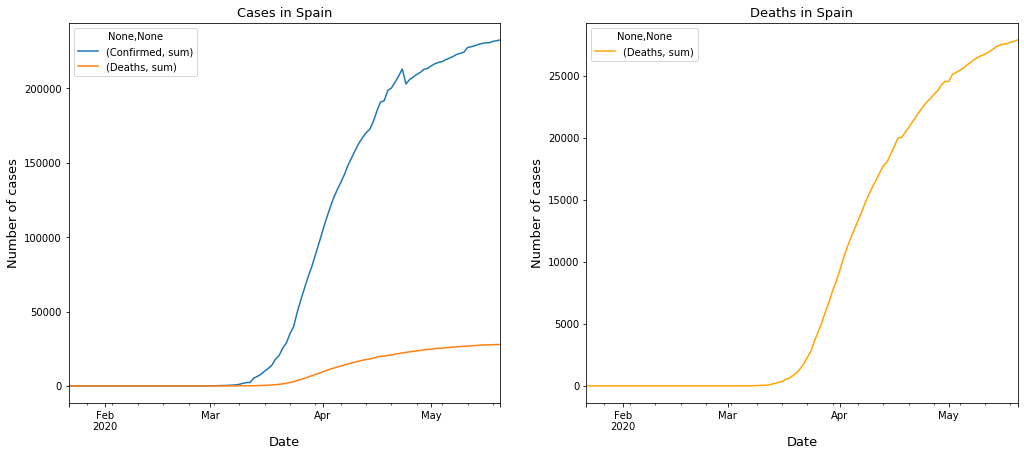

In [19]:
confirmed_total_date_Spain = train[train['Country/Region']=='Spain'].groupby(['Date']).agg({'Confirmed':['sum']})
deaths_total_date_Spain = train[train['Country/Region']=='Spain'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(deaths_total_date_Spain)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_Spain.plot(ax=ax1)
ax1.set_title("Cases in Spain", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
deaths_total_date_Spain.plot(ax=ax2, color='orange')
ax2.set_title("Deaths in Spain", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

(0, 0.5)

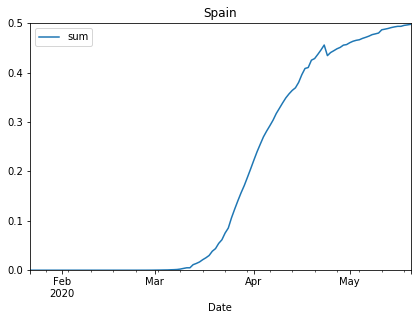

In [20]:
pop_spain = 46749696
total_date_Spain.Confirmed = total_date_Spain.Confirmed/pop_spain*100.
total_date_Spain.Deaths = total_date_Spain.Confirmed/pop_spain*100.
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
total_date_Spain.Confirmed.plot(ax=plt.gca(), title='Spain')
plt.ylim(0, 0.5)


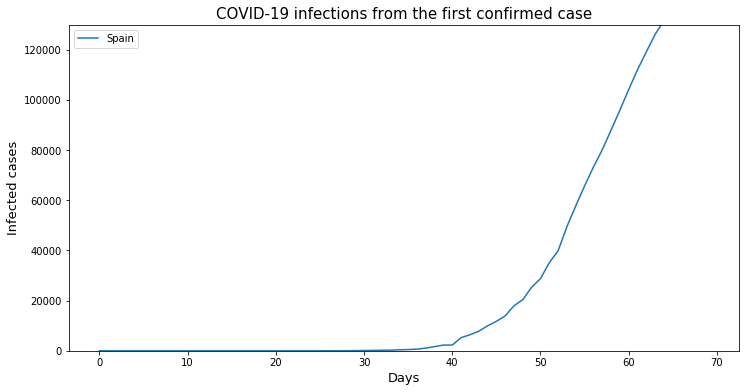

In [21]:
confirmed_total_date_Spain = train[(train['Country/Region']=='Spain') & (train['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
deaths_total_date_Spain = train[(train['Country/Region']=='Spain') & (train['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(deaths_total_date_Spain)
spain = [i for i in total_date_Spain.Confirmed['sum'].values]
spain_30 = spain[0:70] 

plt.figure(figsize=(12,6))
plt.plot(spain_30)
plt.legend(["Spain"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 130000)
plt.show()


Spain has the same number of cumulative infected cases than Italy, near 120.000. 
However, Spain's total population is lower (around 42 millions) and hence the percentage of population that has been infected rises up to 3%.

SIR is a simple model that considers a population that belongs to one of the following states:

Susceptible (S). The individual hasn't contracted the disease, but she can be infected due to transmisison from infected people
Infected (I). This person has contracted the disease
Recovered/Deceased (R). The disease may lead to one of two destinies: either the person survives, hence developing inmunity to the disease, or the person is deceased.

D:\Anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


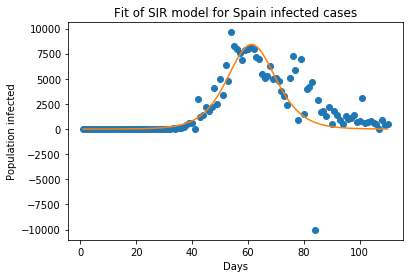

Optimal parameters: beta = 9.15267663109941  and gamma =  8.979627255691696


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy import integrate, optimize
population = float(46750238)
country_df = pd.DataFrame()
country_df['Confirmed'] = train.loc[train['Country/Region']=='Spain'].Confirmed.diff().fillna(0)
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.Confirmed]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0
def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


Models tailored specifically for epidemic spreading (i.e. SIR and its versions) are designed to give a certain idea, in order to understand the spread of the disease. On the other hand, the simple machine learning approaches we used, aim to predict the short term evolution of the infection in the current scenario. They might eventually help to find some features or parameters that are particularly important for the model’s fitting, but by no means they should be confused with scientific epidemic models. We are trying to refine the model but due to lack of complete information, we are unable to built the model perfectly.